# Workshop Task - Training models and preprocessing


We have classification problem where we have to predict whether a credit would be approved or not for a client.


|Field Name|	Order|	Type (Format)|Description|
| -------| -------|-----------|---------|
|checking_status|	1|	string (default)|Status of existing checking account, in Deutsche Mark.|	
|duration	|2|	number (default)	|Duration in months|
|credit_history	|3|	string (default)	|Credit history (credits taken, paid back duly, delays, critical accounts)|
|purpose	|4|	string (default)	|Purpose of the credit (car, television,…)|
|credit_amount	|5|	number (default)	|Credit amount|
|savings_status	|6|	string (default)	|Status of savings account/bonds, in Deutsche Mark.|
|employment	|7|	string (default)	|Present employment, in number of years.|
|installment_commitment	|8|	number (default)|Installment rate in percentage of disposable income|	
|personal_status	|9|	string (default)|Personal status (married, single,…) and sex|
|other_parties	|10|	string (default)|Other debtors / guarantors|	
|residence_since	|11|	number (default)|Present residence since X years|	
|property_magnitude	|12|	string (default)|Property (e.g. real estate)|	
|age	|13|	number (default)	|Age in years|
|other_payment_plans	|14|	string (default)|Other installment plans (banks, stores)|
|housing	|15|	string (default)	|Housing (rent, own,…)|
|existing_credits	|16|	number (default)|Number of existing credits at this bank|	
|job	|17|	string (default)	|Job|
|num_dependents	|18|	number (default)|Number of people being liable to provide maintenance for|	
|own_telephone	|19|	string (default)|Telephone (yes,no)|	
|foreign_worker	|20|	string (default)|Foreign worker (yes,no)|	
accepted	|21|	string (default)	|Class|


Your task is to : 
  1. Use some EDA techniques we learned this week DONE
  2. Using Univariate variable analysis, detect what is wrong with the following features :  DONE
      - purpose
      - duration
      - checking_status
      - personal_status  
    Hint : use dataframe['feature'].unique()
  3. Fix the problems on the features above  DONE
      - hint : Use df.replace from pandas, and df.apply
  4. ?Detect skewed distribution on a numeric variable :
      - ?Use log/sqrt transformation on at least one variable with skewed distribution
      - ?hint : use np.log() or np.sqrt()
  5. Detect missing values and handle them
      * Warning : there are 2 missing type of values
      * hint : dataset = dataset.replace('missing_value', np.nan)

  6. Encode the categorical features
  
  7. Scale the numeric data (some of them)
  
  8. Make train/test split : with train(70%), test(30%) with random_state = 0

  9. Train the model
  
  10. Evaluate the model
  
  11. Achieve accuracy on test set >=0.90
  
  12. For reproducibility please use random_state on train_test_split and model initialization
  
  13. Write a summary :
    - Which model gives the best result?
    - What can we improve in the future?
    - Which encoding give better performance on this dataset (CatBoost or One-Hot)?
    
Bonus points : 
* Add precision/recall evaluation

* Hint : use:  from sklearn.metrics import classification_report

----------------------------
General Support : 
For converting feature to numeric value use :
pd.to_numeric(dataset[feature], errors='coerce')



In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np    
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.preprocessing import MaxAbsScaler, StandardScaler
from sklearn.metrics import roc_curve, confusion_matrix, classification_report
from collections import Counter
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import string
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

In [86]:
dataset = pd.read_csv('dataset-workshop.csv', index_col=0)

In [87]:
df = dataset.copy()
dataset.head(50)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,accepted
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,0_checking,6,Critical_acct_other_credits_existing,radio/television,3380.000000,Unknown_or_no_savings_acct,>7yrs,4,male_single,None,...,real_estate,NaN,none,own,2,skilled_employee/official,1,yes,yes,0
1,from_0_to_200,48,Existing_credits_paid_till_now,radio/television,6940.208336,<100DM,1_to_4yrs,2,female_divorced/separated/married,None,...,real_estate,22.0,none,own,1,skilled_employee/official,1,none,yes,1
2,None,12,Critical_acct_other_credits_existing,education,1902.370483,<100DM,4_to_7yrs,2,male_single,None,...,real_estate,49.0,none,own,1,unskilled_resident,2,none,yes,0
3,0_checking,42,Existing_credits_paid_till_now,furniture/equipment,1097.000000,<100DM,4_to_7yrs,2,male_single,guarantor,...,building_society_savings_agreement/life_insurance,45.0,none,for_free,1,skilled_employee/official,2,none,yes,0
4,0_checking,24,Delay_in_past,new_car,9021.266894,<100DM,1_to_4yrs,3,male_single,None,...,unknown/no_property,53.0,none,for_free,2,skilled_employee/official,2,none,yes,1
5,None,36,Existing_credits_paid_till_now,education,1227.203916,Unknown_or_no_savings_acct,1_to_4yrs,2,male_single,None,...,unknown/no_property,35.0,none,for_free,1,unskilled_resident,2,yes,yes,0
6,None,24,Existing_credits_paid_till_now,furniture/equipment,1985.000000,500_to_1000DM,>7yrs,3,male_single,None,...,building_society_savings_agreement/life_insurance,53.0,none,own,1,skilled_employee/official,1,none,yes,0
7,from_0_to_200,36,None,used_car,2809.000000,<100DM,1_to_4yrs,2,male_single,None,...,car_or_other_nonsavings,35.0,none,rent,1,management_self-employed_highly_qualified/officer,1,yes,yes,0
8,None,12,Existing_credits_paid_till_now,radio/television,2484.663607,>1000DM,4_to_7yrs,2,male_divorced/separated,None,...,real_estate,61.0,none,own,1,unskilled_resident,1,none,yes,0


In [88]:
for col in df.columns:
    if pd.api.types.is_string_dtype(df[col].dtype):
        df[col] = df[col].str.lower().str.strip() 

In [89]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,accepted
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,0_checking,6,critical_acct_other_credits_existing,radio/television,3380.000000,unknown_or_no_savings_acct,>7yrs,4,male_single,none,...,real_estate,NaN,none,own,2,skilled_employee/official,1,yes,yes,0
1,from_0_to_200,48,existing_credits_paid_till_now,radio/television,6940.208336,<100dm,1_to_4yrs,2,female_divorced/separated/married,none,...,real_estate,22.0,none,own,1,skilled_employee/official,1,none,yes,1
2,none,12,critical_acct_other_credits_existing,education,1902.370483,<100dm,4_to_7yrs,2,male_single,none,...,real_estate,49.0,none,own,1,unskilled_resident,2,none,yes,0
3,0_checking,42,existing_credits_paid_till_now,furniture/equipment,1097.000000,<100dm,4_to_7yrs,2,male_single,guarantor,...,building_society_savings_agreement/life_insurance,45.0,none,for_free,1,skilled_employee/official,2,none,yes,0
4,0_checking,24,delay_in_past,new_car,9021.266894,<100dm,1_to_4yrs,3,male_single,none,...,unknown/no_property,53.0,none,for_free,2,skilled_employee/official,2,none,yes,1


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1003 entries, 0 to 1002
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1003 non-null   object 
 1   duration                1003 non-null   object 
 2   credit_history          1003 non-null   object 
 3   purpose                 1003 non-null   object 
 4   credit_amount           1003 non-null   float64
 5   savings_status          1003 non-null   object 
 6   employment              1003 non-null   object 
 7   installment_commitment  1003 non-null   int64  
 8   personal_status         1003 non-null   object 
 9   other_parties           1003 non-null   object 
 10  residence_since         1003 non-null   int64  
 11  property_magnitude      1003 non-null   object 
 12  age                     953 non-null    float64
 13  other_payment_plans     1003 non-null   object 
 14  housing                 1003 non-null   

In [91]:
# Dealing with typos

df['duration'] = dataset['duration'].replace({"18`":18, 'None': np.nan})
df['duration'] = df['duration'].astype(float)
#print(df['duration'].value_counts())
#print('\'')
df['personal_status'] = dataset['personal_status'].replace({'feemale_divorced/separated/married':'female_divorced/separated/married'})
df['checking_status'] = dataset['checking_status'].replace({
                                                            "more_then_200":'more_than_200',
                                                            "zero_checking":'0_checking',
                                                            "from_zero_to_200":'from_0_to_200',
                                                            'None': np.nan,
                                                           })
df['credit_history'] = dataset['credit_history'].replace({'None': np.nan})
df['purpose'] = dataset['purpose'].replace({
                                            "usedcar":'used_car',
                                            "newcar":'new_car',
                                           })


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1003 entries, 0 to 1002
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         609 non-null    object 
 1   duration                950 non-null    float64
 2   credit_history          953 non-null    object 
 3   purpose                 1003 non-null   object 
 4   credit_amount           1003 non-null   float64
 5   savings_status          1003 non-null   object 
 6   employment              1003 non-null   object 
 7   installment_commitment  1003 non-null   int64  
 8   personal_status         1003 non-null   object 
 9   other_parties           1003 non-null   object 
 10  residence_since         1003 non-null   int64  
 11  property_magnitude      1003 non-null   object 
 12  age                     953 non-null    float64
 13  other_payment_plans     1003 non-null   object 
 14  housing                 1003 non-null   

In [93]:
# drop features we deem to be too dirty or unnecessary
df.drop(columns=['checking_status'], inplace=True)
df.dropna(subset=['credit_history'], inplace=True)

# fill in missing data where needed.
df['duration'].fillna(df['duration'].value_counts().sort_values(ascending=False).index[0], inplace=True)
df['age'].fillna(df['age'].mean(), inplace=True)

df['duration'] = df['duration'].astype(int)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 953 entries, 0 to 1002
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   duration                953 non-null    int32  
 1   credit_history          953 non-null    object 
 2   purpose                 953 non-null    object 
 3   credit_amount           953 non-null    float64
 4   savings_status          953 non-null    object 
 5   employment              953 non-null    object 
 6   installment_commitment  953 non-null    int64  
 7   personal_status         953 non-null    object 
 8   other_parties           953 non-null    object 
 9   residence_since         953 non-null    int64  
 10  property_magnitude      953 non-null    object 
 11  age                     953 non-null    float64
 12  other_payment_plans     953 non-null    object 
 13  housing                 953 non-null    object 
 14  existing_credits        953 non-null    i

In [95]:
# oridnal encoding
col_maps = {'savings_status': {
               'unknown_or_no_savings_acct':0,
               '<100dm':1,
               '100_to_500dm':2,
               '500_to_1000dm':3,
               '>1000dm':4,
            },
            'employment': {
                'unemployed': 0,
                '<1yr': 1,
                '1_to_4yrs': 2,
                '4_to_7yrs': 3,
                '>7yrs': 4
            }
           }

for k, v in col_maps.items():
    df[k] = df[k].replace(v)
    df[k] = df[k].astype('category')




In [96]:
# df.to_csv("df2.csv")
from sklearn.preprocessing import LabelEncoder
# label encoding
lbl_cols = df.select_dtypes(include='object')

for col in lbl_cols:
    df[col] = LabelEncoder().fit_transform(df[col])
    df[col] = df[col].astype('category')



In [97]:
df

,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,accepted
Unnamed: 0,,,,,,,,,,,,,,,,,,,,
0,6,1,6,3380.000000,0,4,4,3,2,4,2,35.530387,1,1,2,1,1,1,1,0
1,48,3,6,6940.208336,1,2,2,0,2,2,2,22.000000,1,1,1,1,1,0,1,1
2,12,1,2,1902.370483,1,3,2,3,2,3,2,49.000000,1,1,1,3,2,0,1,0
3,42,3,3,1097.000000,1,3,2,3,1,4,0,45.000000,1,0,1,1,2,0,1,0
4,24,2,4,9021.266894,1,2,3,3,2,4,3,53.000000,1,0,2,1,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,12,3,3,3143.481540,1,3,3,0,2,4,2,31.000000,1,1,1,3,1,0,1,0
999,30,3,9,4200.276629,1,2,4,1,2,4,0,40.000000,1,1,1,0,1,1,1,0
1000,12,3,6,1094.000000,1,4,4,3,2,4,1,38.000000,1,1,1,1,1,0,1,0


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 953 entries, 0 to 1002
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   duration                953 non-null    int32   
 1   credit_history          953 non-null    category
 2   purpose                 953 non-null    category
 3   credit_amount           953 non-null    float64 
 4   savings_status          953 non-null    category
 5   employment              953 non-null    category
 6   installment_commitment  953 non-null    int64   
 7   personal_status         953 non-null    category
 8   other_parties           953 non-null    category
 9   residence_since         953 non-null    int64   
 10  property_magnitude      953 non-null    category
 11  age                     953 non-null    float64 
 12  other_payment_plans     953 non-null    category
 13  housing                 953 non-null    category
 14  existing_credits        9

In [99]:
X = df.drop(columns=['accepted'])
y = df['accepted']

In [100]:
X.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,21.250787,4558.206672,2.982162,2.853095,35.530387,1.409234,1.156348
std,11.893570,3709.107901,1.120238,1.099768,11.017624,0.578319,0.363376
min,4.000000,505.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1930.000000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,3682.000000,3.000000,3.000000,34.000000,1.000000,1.000000
75%,24.000000,5968.004707,4.000000,4.000000,41.000000,2.000000,1.000000
max,72.000000,27389.000000,4.000000,4.000000,75.000000,4.000000,2.000000


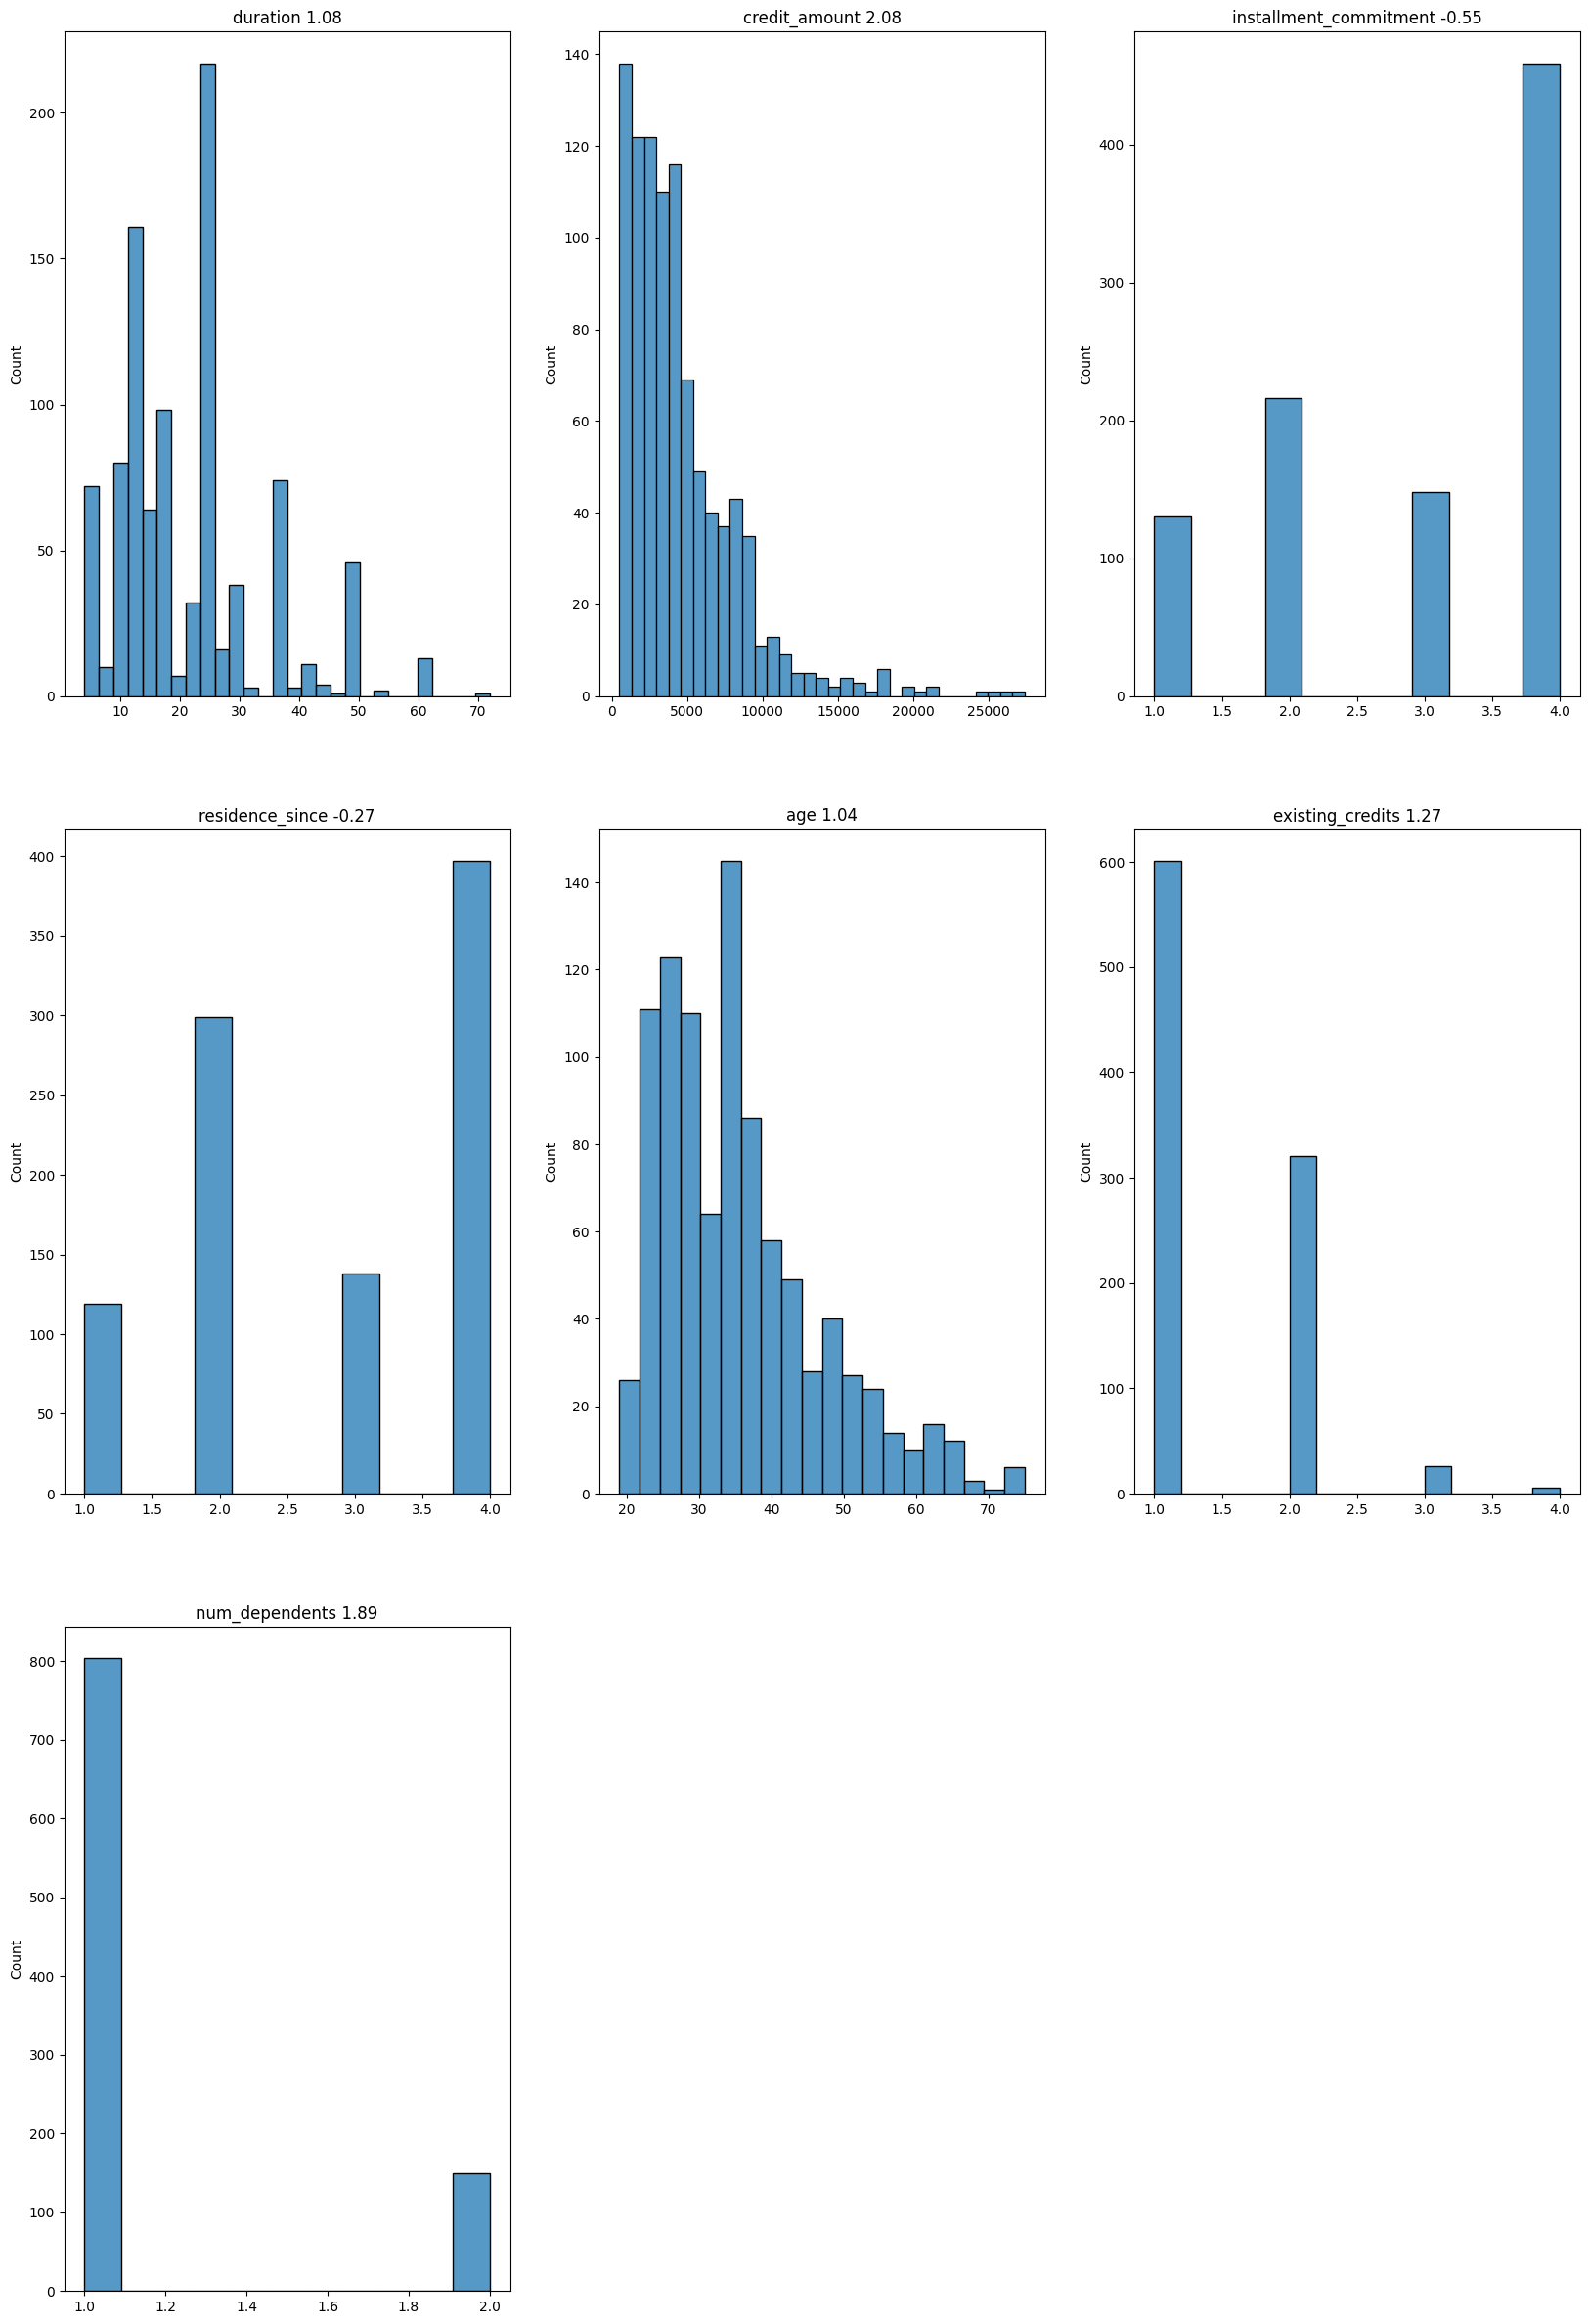

In [101]:
# check the skew
import scipy
num_cols = X.select_dtypes('number').columns
fig = plt.figure(figsize=(20,30))
i = 1
for col in num_cols:
    t_x = df[col].values
#     t_x = PowerTransformer().fit_transform(t_x.reshape(-1,1))
#     t_x = np.array(t_x).reshape(1, -1)[0]
    plt.subplot(3, 3, i)
    sns.histplot(t_x)
    plt.title(col+f' {scipy.stats.skew(t_x):.2f}')
    i+=1

In [103]:
##Skew

# list the columns you want to transform with np.log
columns_to_transform = ['duration', 'installment_commitment', 'credit_amount','num_d']

# calculate the natural logarithm of each value in each column
for col in columns_to_transform:
    df[col + "_log"] = np.log(df[col])

# print the updated dataset
print(df)



,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
Unnamed: 0,,,,,,,,,,,,,,,,,,,
0,6,1,6,13.527423,0,4,4,3,2,4,2,1.401242,1,1,2,1,1,1,1
1,48,3,6,15.458445,1,2,2,0,2,2,2,1.347966,1,1,1,1,1,0,1
2,12,1,2,12.096995,1,3,2,3,2,3,2,1.429343,1,1,1,3,2,0,1
3,42,3,3,10.814098,1,3,2,3,1,4,0,1.422422,1,0,1,1,2,0,1
4,24,2,4,16.203565,1,2,3,3,2,4,3,1.435410,1,0,2,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,12,3,3,13.341549,1,3,3,0,2,4,2,1.387577,1,1,1,3,1,0,1
999,30,3,9,14.093621,1,2,4,1,2,4,0,1.412241,1,1,1,0,1,1,1
1000,12,3,6,10.807920,1,4,4,3,2,4,1,1.407575,1,1,1,1,1,0,1


In [104]:
##Scale numeric data

from sklearn.preprocessing import MinMaxScaler
# Select the numeric columns that you want to scale
numeric_cols = X.select_dtypes(include=[np.number]).columns

# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler to the numeric columns of the data
scaler.fit(df[numeric_cols])

# Transform the numeric columns
df[numeric_cols] = scaler.transform(df[numeric_cols])

# Show the scaled data
print(X.head())







            duration credit_history purpose  credit_amount savings_status  \
Unnamed: 0                                                                  
0                  6              1       6      13.527423              0   
1                 48              3       6      15.458445              1   
2                 12              1       2      12.096995              1   
3                 42              3       3      10.814098              1   
4                 24              2       4      16.203565              1   

           employment  installment_commitment personal_status other_parties  \
Unnamed: 0                                                                    
0                   4                       4               3             2   
1                   2                       2               0             2   
2                   3                       2               3             2   
3                   3                       2               3    

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size=0.3, random_state=0)


In [106]:
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

assert X_train.shape[1] == X_test.shape[1]
assert type(y_train) == type(y_test)

In [107]:
# Train the model
model_list = list()
for md in (1, 3, 5, 7, 9, None):
    for crit in ('gini', 'entropy','log_loss'):
        model_list.append(DecisionTreeClassifier(max_depth=md, criterion=crit))
    
for k in (1, 3, 5, 7, 9):
    model_list.append(KNeighborsClassifier(n_neighbors=k))
    
print(model_list)
print(len(model_list))


[DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(criterion='entropy', max_depth=1), DecisionTreeClassifier(criterion='log_loss', max_depth=1), DecisionTreeClassifier(max_depth=3), DecisionTreeClassifier(criterion='entropy', max_depth=3), DecisionTreeClassifier(criterion='log_loss', max_depth=3), DecisionTreeClassifier(max_depth=5), DecisionTreeClassifier(criterion='entropy', max_depth=5), DecisionTreeClassifier(criterion='log_loss', max_depth=5), DecisionTreeClassifier(max_depth=7), DecisionTreeClassifier(criterion='entropy', max_depth=7), DecisionTreeClassifier(criterion='log_loss', max_depth=7), DecisionTreeClassifier(max_depth=9), DecisionTreeClassifier(criterion='entropy', max_depth=9), DecisionTreeClassifier(criterion='log_loss', max_depth=9), DecisionTreeClassifier(), DecisionTreeClassifier(criterion='entropy'), DecisionTreeClassifier(criterion='log_loss'), KNeighborsClassifier(n_neighbors=1), KNeighborsClassifier(n_neighbors=3), KNeighborsClassifier(), KNeighborsClas

In [108]:
eval_dict = dict()
for model in model_list:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    eval_dict[str(model)] = f1_score(y_test, y_pred, average='macro')
pd.DataFrame.from_dict(eval_dict, orient='index', columns=['f1']).sort_values(by='f1', ascending=False)

,f1
DecisionTreeClassifier(max_depth=1),0.960800
"DecisionTreeClassifier(criterion='log_loss', max_depth=1)",0.960800
DecisionTreeClassifier(max_depth=3),0.960800
"DecisionTreeClassifier(criterion='entropy', max_depth=3)",0.960800
"DecisionTreeClassifier(criterion='log_loss', max_depth=3)",0.960800
"DecisionTreeClassifier(criterion='entropy', max_depth=1)",0.960800
DecisionTreeClassifier(max_depth=5),0.953199
"DecisionTreeClassifier(criterion='entropy', max_depth=5)",0.944833
"DecisionTreeClassifier(criterion='log_loss', max_depth=5)",0.944833
DecisionTreeClassifier(),0.917891


In [109]:
f1 = f1_score(y_test, y_pred, average='macro')
print("F1 Score:", f1)

F1 Score: 0.8336103723404255


In [110]:
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1
0,171,22
1,20,73


In [111]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       193
           1       0.77      0.78      0.78        93

    accuracy                           0.85       286
   macro avg       0.83      0.84      0.83       286
weighted avg       0.85      0.85      0.85       286



In [112]:
print('F1_score for micro is:',f1_score(y_test, y_pred, average='micro'))
print('F1_score for macro is:',f1_score(y_test, y_pred, average='macro'))
print('F1_score for weighted is:',f1_score(y_test, y_pred, average='weighted'))

F1_score for micro is: 0.8531468531468531
F1_score for macro is: 0.8336103723404255
F1_score for weighted is: 0.8535455568367801


In [113]:
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(C=1.0,kernel='rbf',gamma='scale',decision_function_shape='ovr') 

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)



In [114]:
print("Accuracy with f1:",metrics.f1_score(y_test, y_pred))
print("Accuracy with acc_score:",metrics.accuracy_score(y_test, y_pred))

Accuracy with f1: 0.7790697674418606
Accuracy with acc_score: 0.8671328671328671


In [117]:
# Define the model
svc = SVC()

# Define the parameter grid to search
param_grid = {'kernel': ['rbf', 'sigmoid'], 'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}

# Perform grid search with 5-fold cross validation
grid = GridSearchCV(svc, param_grid, cv=5)
grid.fit(X_train, y_train)

# Find the optimal parameters
optimal_kernel = grid.best_params_['kernel']
optimal_C = grid.best_params_['C']
optimal_gamma = grid.best_params_['gamma']

# Refit the model with optimal parameters
svc = SVC(kernel=optimal_kernel, C=optimal_C, gamma=optimal_gamma)
svc.fit(X_train, y_train)

# Print the accuracy score on the training data
print('Accuracy on training data on SVC is:', svc.score(X_train, y_train))


Accuracy on training data on SVC is: 0.9280359820089955


In [118]:
print('Vasil Stamenkoski')

Vasil Stamenkoski
